# Árvore de Decisão - Risco de Crédito

In [54]:
# Instalando bibliotecas
#%pip install pydotplus

In [55]:
# importando blibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from IPython.display import Image
import pydotplus

In [56]:
# Carrega o Dataset de Risco de Crédito
df_risco_credito = pd.read_csv('../../datasets/risco_credito_exemplo.csv')
df_risco_credito.head()

,idade,renda_mensal,historico_pagamento,valor_emprestimo,motivo_emprestimo,risco_credito
0,33,4800,Medio,18000,Pessoal,Nao_Risco
1,58,2200,Ruim,6000,Emergencia,Risco
2,26,3500,Bom,12000,Carro,Nao_Risco
3,41,5500,Excelente,28000,Casa,Nao_Risco
4,29,1800,Medio,4000,Emergencia,Risco


In [57]:
# Pré-processamento e Engenharia de Features
df_risco_credito = pd.get_dummies(df_risco_credito, columns=['motivo_emprestimo'], prefix='motivo')
historico_pagamento_mapping = {'Ruim':1, 'Medio':2,'Bom':3,'Excelente':4}
df_risco_credito['historico_pagamento_ordinal'] = df_risco_credito['historico_pagamento'].map(historico_pagamento_mapping)
df_risco_credito.drop('historico_pagamento', axis=1, inplace=True)
df_risco_credito = df_risco_credito.dropna()

In [58]:
# Converte variavel alvo 'risco_credito' para numerico (0 e 1)
risco_credito_mapping = {'Nao_Risco':0,'Risco':1}
df_risco_credito['risco_credito_num'] = df_risco_credito['risco_credito'].map(risco_credito_mapping)
df_risco_credito.drop('risco_credito', axis=1, inplace=True)

In [59]:
# Define Features X e Variavel Alvo Y
features = ['idade', 'renda_mensal', 'historico_pagamento_ordinal'] + [col for col in df_risco_credito.columns if col.startswith('motivo_')]
X = df_risco_credito[features]
y = df_risco_credito['risco_credito_num']

In [60]:
# Divisão dos Dados de Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [61]:
# Treina o Modelo de Árvore de Decisão
arvore_decisao = DecisionTreeClassifier(max_depth=3, random_state=42)
arvore_decisao.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [62]:
# Fazer Previsões no Conjunto de Teste e Avaliar
y_pred = arvore_decisao.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
relatorio_classificacao = classification_report(y_test,y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)

print(f"Acurácia da Árvore de Decisão no conjunto de teste: {acuracia:.4f}")
print(f"Relatório de Classificação: {relatorio_classificacao}")

Acurácia da Árvore de Decisão no conjunto de teste: 1.0000
Relatório de Classificação:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       145

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596



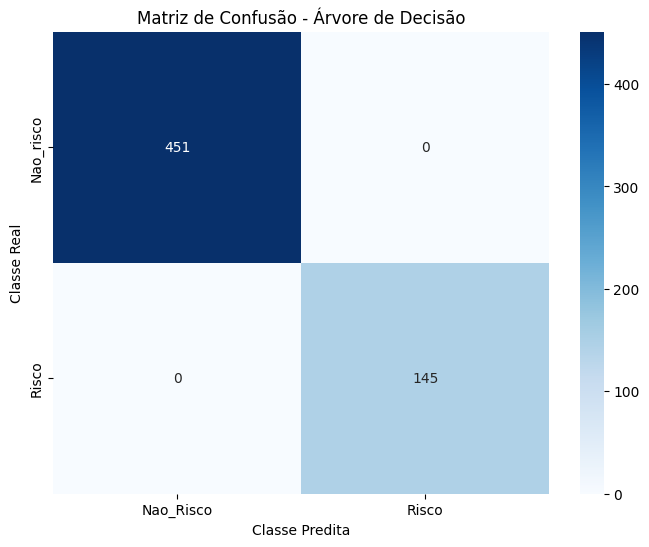

In [63]:
# Visualizar Matriz de Confusão
plt.figure(figsize=(8,6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Nao_Risco', 'Risco'], yticklabels=['Nao_risco', 'Risco']
            )
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()

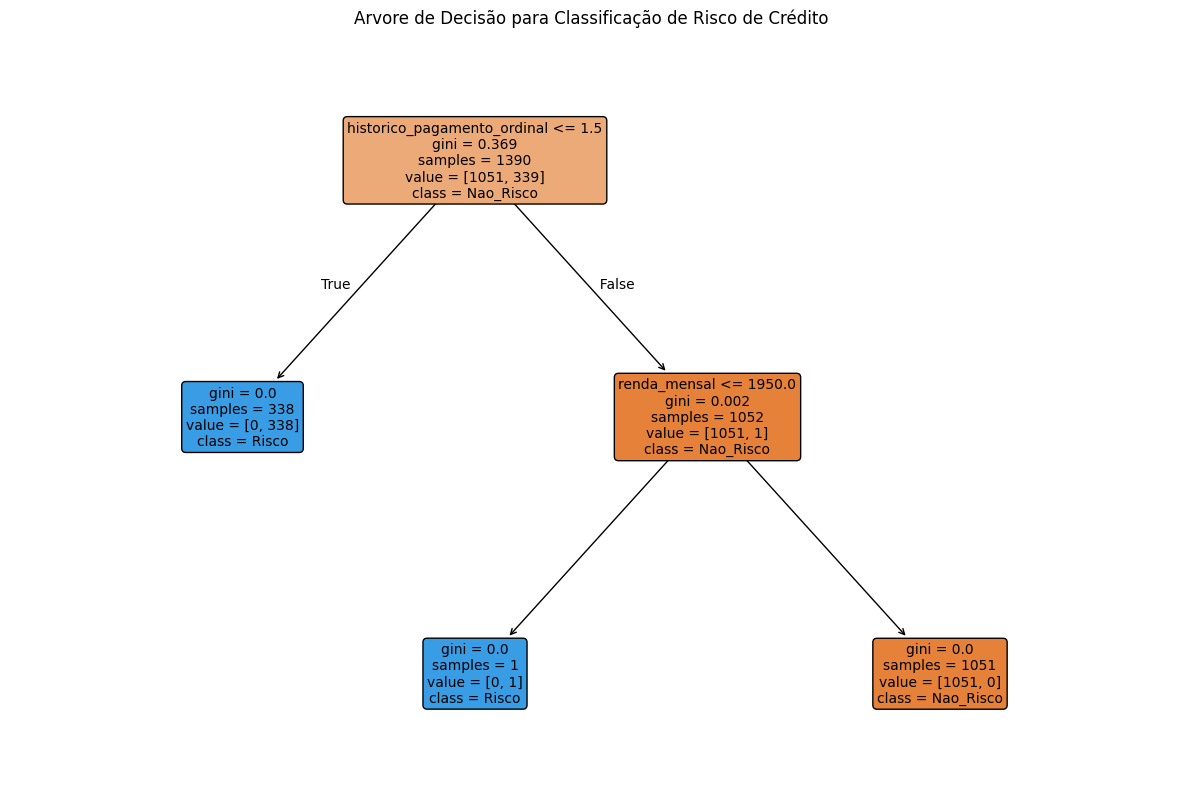

In [64]:
# Visualizar a Árvore de Decisão
plt.figure(figsize=(15,10))
plot_tree(arvore_decisao, feature_names=features, class_names=['Nao_Risco', 'Risco'], filled=True, rounded=True, fontsize=10)
plt.title('Arvore de Decisão para Classificação de Risco de Crédito')
plt.show()

In [65]:
# Análise de Importância dde Variáveis
importancia_features = pd.DataFrame({'Feature': features, 'Importância':arvore_decisao.feature_importances_})
importancia_features = importancia_features.sort_values(by='Importância', ascending=False).reset_index(drop=True)
print(importancia_features)

                       Feature  Importância
0  historico_pagamento_ordinal     0.996102
1                 renda_mensal     0.003898
2                        idade     0.000000
3                 motivo_Carro     0.000000
4                  motivo_Casa     0.000000
5              motivo_Educacao     0.000000
6            motivo_Emergencia     0.000000
7             motivo_Nao_Risco     0.000000
8               motivo_Pessoal     0.000000


C:\Users\josaf\AppData\Local\Temp\ipykernel_15336\4272069802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Feature', data=importancia_features, palette='viridis')


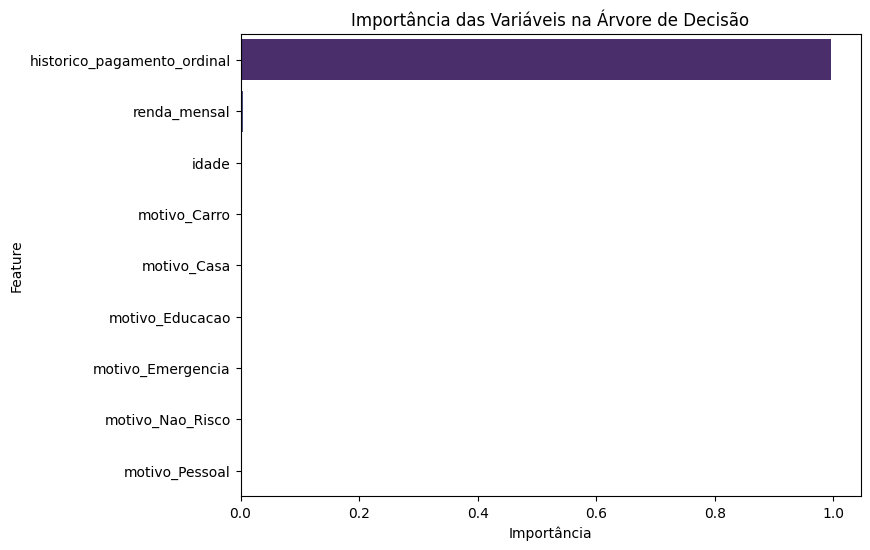

In [66]:
# Visualizar Importância das Variáveis
plt.figure(figsize=(8,6))
sns.barplot(x='Importância', y='Feature', data=importancia_features, palette='viridis')
plt.title('Importância das Variáveis na Árvore de Decisão')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()